#Project Title:
##Stochastic Gradient Descent on Linear Regression

Imagine you like to go to the gym; however, you hate getting to the gym and finding that it is so crowded that you must wait to use the machines you want.

Luckily, you have all the skills and knowledge to build a model that will help you predict the best time to go to the gym and avoid crowds, so you can enjoy a great workout with minimal wait times and no crowds.

Our task is to use the “Crowdedness at the Campus Gym” dataset, which contains historic information about how crowded the campus gym is on a given day and hour, as well as other specific information about the specific days

This dataset contains over 60,000 observations about how many people were at the gym on a particular day and time. It contains 11 columns

##Step 2  · Import Libraries and Load the Data

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [28]:
crowdness = pd.read_csv('crowdness_gym_data.csv')

In [29]:
crowdness.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [30]:
crowdness.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


After inspecting the statistics, the dataset appears to be fairly straightforward. However, the date column, being an object, has no statistics, and the timestamp feature may be difficult to work with.

Most of the other features seem promising, including binary features such as is_holiday and is_weekend.

However, we have identified the date column as a problematic feature, as it duplicates information that is already provided by other features in the dataset. Therefore, we will remove the date column using the .drop() method

In [31]:
#remove date column
crowdness = crowdness.drop('date', axis = 1)

In [32]:
#Check for missing values
crowdness.isna().sum()

number_people           0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

##Step 3 · EDA and Cleaning the Data

In [33]:
cor_matrix = crowdness.corr()
cor_matrix

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


The correlation matrix provides valuable information on the strength and direction of the relationship between each variable and the target variable, number_people. The variables with the highest positive correlation to number_people are hour, temperature, and surprisingly, is_during_semester. On the other hand, is_weekend and day_of_week have negative correlations to number_people.

Furthermore, it appears that timestamp and hour are highly correlated, indicating that one of these variables may be redundant.

One way to enhance our understanding of the relationships among variables is by using Seaborn's heatmap() function. It provides a visual representation of the correlations, which can make it easier to identify patterns and insights.

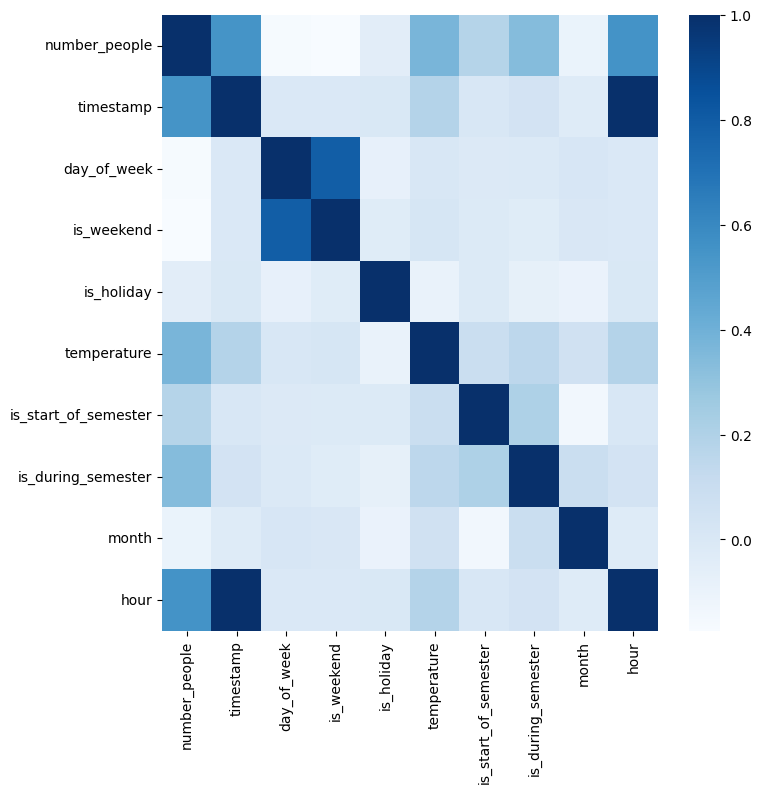

In [34]:
plt.figure(figsize=(8, 8))
sns.heatmap(cor_matrix, cmap='Blues')

plt.show()

The results confirm our previous observations that the hour, temperature, and is_during_semester variables are the most significant factors affecting the number of people visiting the gym.

Furthermore, as previously discussed, the timestamp variable appears to be redundant. Thus, we will drop the timestamp column before proceeding with model building.

In [35]:
crowdness = crowdness.drop('timestamp', axis=1)
crowdness.head()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,4,0,0,71.76,0,0,8,17
1,45,4,0,0,71.76,0,0,8,17
2,40,4,0,0,71.76,0,0,8,17
3,44,4,0,0,71.76,0,0,8,17
4,45,4,0,0,71.76,0,0,8,17


We are now ready to begin with our Exploratory Data Analysis (EDA).

To start off, we will conduct a Univariate Analysis on some of the features. This will involve taking a closer look at the distributions of certain features.

Our focus will be on the month, day_of_week, and hour features, as they are likely to have the most significant impact on the number of people in the gym. We will create bar plots to visualize these distributions.



##Step 3  · EDA and Cleaning the Data

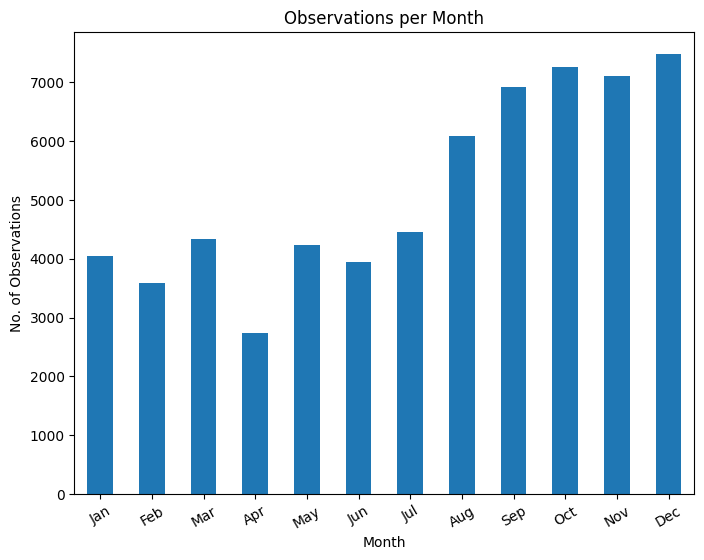

In [36]:
# Group the data by month and count the number of observations
month_counts = crowdness.groupby('month')['month'].count()

# Plot the results using a bar chart
month_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Observations per Month')
plt.ylabel('No. of Observations')
plt.xlabel('Month')

# Set the x-tick labels to be the month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=np.arange(12), labels=month_names, rotation=30)

plt.show()

After seeing the plot, it appears that December and January have the highest number of observations, indicating they are popular months for gym visits. Additionally, the observations at the beginning of the academic year (August and September) are higher compared to the end (April), which could be due to people having more motivation to exercise at the start of the academic year and being more focused on studying and exams towards the end.

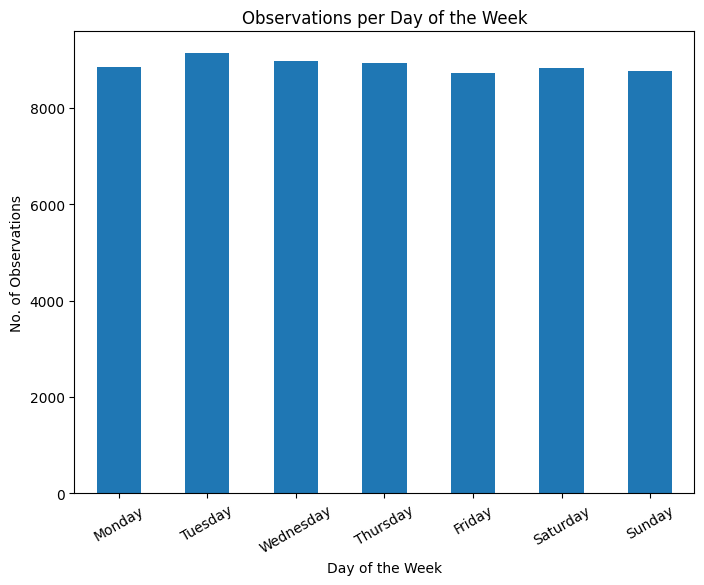

In [37]:
plt.figure(figsize=(8, 6))

# Frequency count of each day of the week
crowdness['day_of_week'].value_counts().sort_index().plot(kind='bar')
plt.title('Observations per Day of the Week')
plt.ylabel('No. of Observations')
plt.xlabel('Day of the Week')

# Get the day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(7), day_names, rotation=30)

plt.show()

Based on the above results, we can observe that the number of gym visitors is relatively consistent throughout the week, with a slightly higher number of visitors on Tuesday compared to other days. Additionally, we do not see any significant drop in the number of observations on weekends, indicating that the gym is equally popular on weekends as on weekdays.

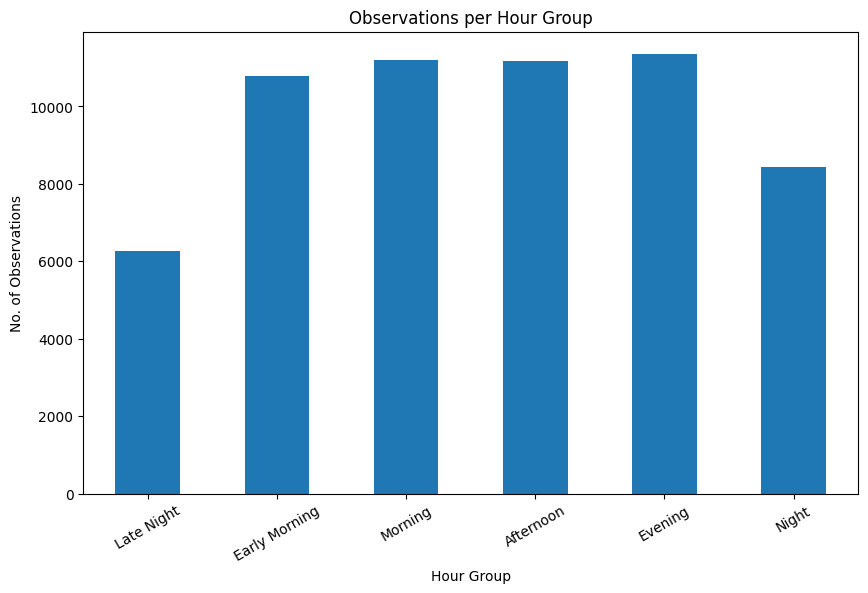

In [38]:
# Create new dataframe for visualization
gym_viz = crowdness.copy()

# Group hours into broader time intervals
gym_viz['hour_group'] = pd.cut(gym_viz['hour'], bins=[0, 4, 8, 12, 16, 20, 24], 
                               labels=['Late Night', 'Early Morning', 'Morning', 
                                       'Afternoon', 'Evening', 'Night'])

# Plot bar chart
plt.figure(figsize=(10, 6))
gym_viz.groupby('hour_group')['hour'].count().plot(kind='bar')
plt.xlabel('Hour Group')
plt.xticks(rotation=30)
plt.ylabel('No. of Observations')
plt.title('Observations per Hour Group')
plt.show()

We can observe that the gym is busiest during regular hours, with the highest number of visitors in the morning, afternoon, and evening. However, there is still a considerable number of visitors who prefer to work out during the early morning and night hours. Therefore, it may be a good strategy to visit the gym during off-peak hours, such as night or even better late at night, to avoid crowds and long wait times for equipment.

This is an interesting observation, but to gain more insights in building a model to predict the number of gym visitors (target variable), we can utilize Bivariate Analysis which examines the relationship between two variables to identify any correlation between them.

To do this, we can plot the correlation between the number of gym visitors and the variables of month, day of the week, and hour of the day. This will allow us to gain a better understanding of how these variables affect the number of gym visitors and inform our model-building process.

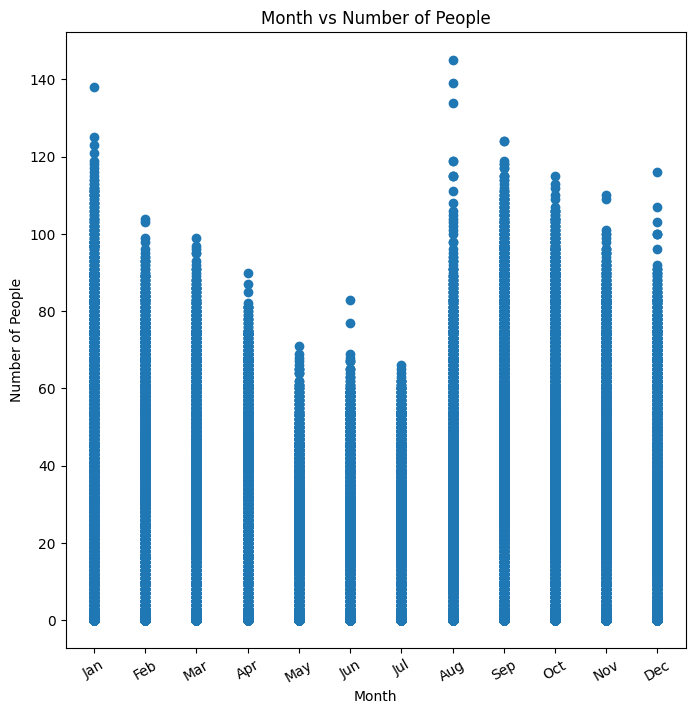

In [39]:
plt.figure(figsize=(8, 8))

# Scatter plot between 'month' and 'number_people'
plt.scatter(crowdness['month'], crowdness['number_people'])
plt.title('Month vs Number of People')
plt.ylabel('Number of People')
plt.xlabel('Month')
plt.xticks(ticks=np.arange(1, 13), labels=month_names, rotation=30)

plt.show()

A more precise understanding of the relationship between the month variable and the number of people reveals that August and January have the highest peaks of gym visitors. Additionally, there is a noticeable decline in the number of visitors towards the end of the semester (May) compared to the beginning.

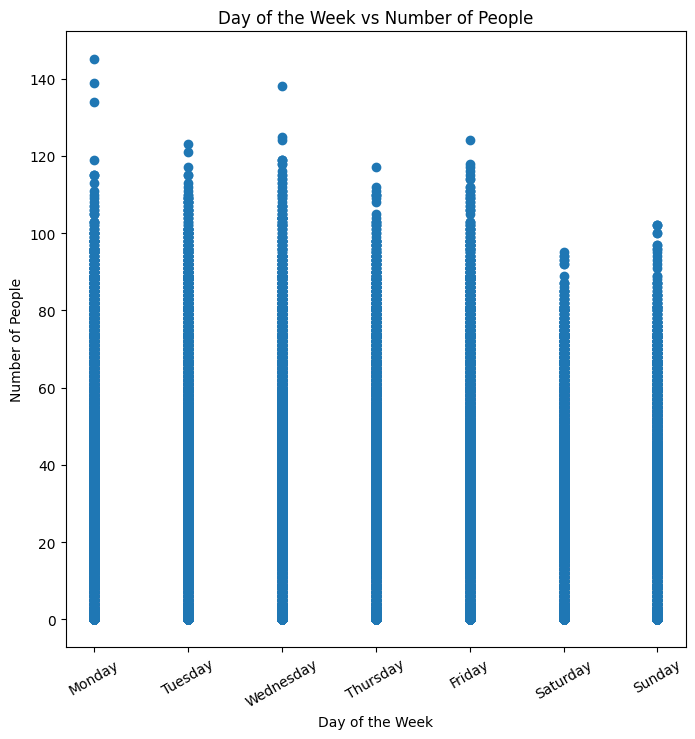

In [40]:
plt.figure(figsize=(8, 8))

# Scatter plot between 'day_of_week' and 'number_people'
plt.scatter(crowdness['day_of_week'], crowdness['number_people'])
plt.title('Day of the Week vs Number of People')
plt.ylabel('Number of People')
plt.xlabel('Day of the Week')
plt.xticks(range(7), day_names, rotation=30)

plt.show()

It is evident that the highest peaks occur on Mondays and Wednesdays, while Saturdays have the lowest peaks.

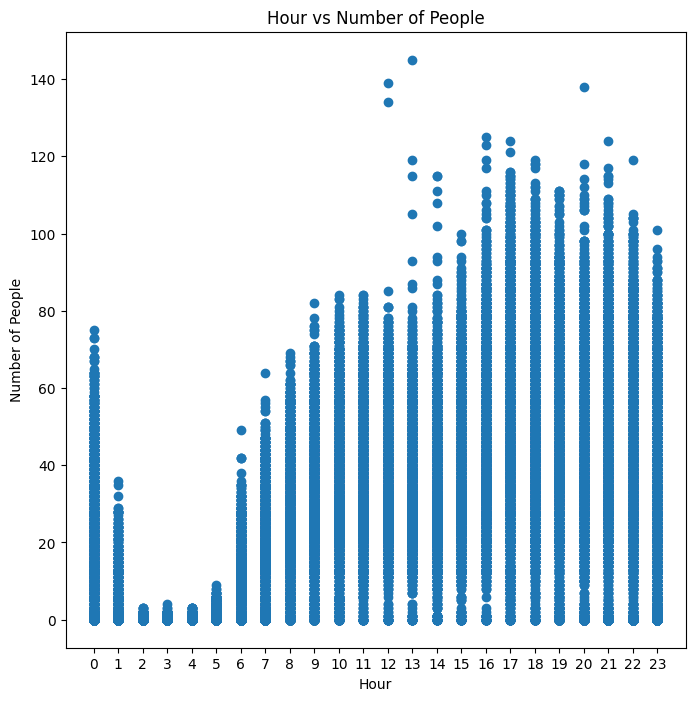

In [41]:
plt.figure(figsize=(8, 8))

# Scatter plot between 'hour' and 'number_people'
plt.scatter(crowdness['hour'], crowdness['number_people'])
plt.title('Hour vs Number of People')
plt.ylabel('Number of People')
plt.xlabel('Hour')

# Set the xticks
xticks = [i for i in range(0, 24)]
plt.xticks(xticks)

plt.show()

After analyzing the scatter plot between hour and number_people, again we can observe some interesting trends. The peak number of people occurs during the afternoon and evening hours, which is expected as these are typically convenient times for people to visit the gym. However, what is surprising is the relatively high number of people visiting the gym at night. On the other hand, the part of late night and early morning hours (2am to 5am) have very small peaks, indicating that very few people prefer to workout at these hours.


##Step 4 of 9 · Preparing to Build Our Model

Now we have a clean dataset, and we we have analyzed it and removed any variables that we don't consider important — or that they contain too much noise for our model. The next step is to prepare our data for modeling.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [43]:
# Get the numpy representation of the data
data = crowdness.values

# Split data into X features and y target variable
X = data[:, 1:]
y = data[:, 0]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=1)

We'll proceed with building the model using SGDRegressor. We'll set the learning rate to optimal, use huber loss as the loss function, and apply elasticnet as the penalty. After this, we'll fit the model with the training data

In [44]:
# Create the model
sgdr_v1 = SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet', random_state=1)

# Train the model
sgdr_v1.fit(X_train, y_train)

SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=1)

##Step 5· Measure the Performance of the Model

In [45]:
# Make model predictions
y_pred_v1 = sgdr_v1.predict(X_test)

# Evaluate results
print(f'Mean squared error: {round( mean_squared_error(y_test, y_pred_v1), 3)}')
print(f'Mean absolute error: { round(mean_absolute_error(y_test, y_pred_v1), 3)}')
print(f'R2 score: {round(r2_score(y_test, y_pred_v1), 3)}')

Mean squared error: 263.862
Mean absolute error: 12.275
R2 score: 0.498


The Mean Squared Error and Mean Absolute Error are relatively high, indicating that the model's accuracy is not very high. The R2 Score shows a correlation of 0.408, which is also not ideal, as we ideally want it to be as close to 1 as possible for better accuracy.

To enhance the model's performance, we can try normalizing the features by scaling them from -1 to 1 using the StandardScaler from Scikit Learn library. This could potentially lead to an improved model.

In [46]:
from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()

# Scale training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Next, we'll build another model using the scaled data and see if the performance improves. We'll use the same hyperparameters as before to ensure consistent results.

In [47]:
# Create new model
sgdr_v2 = SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet', random_state=42)

# Train the model on scaled data
sgdr_v2.fit(X_train_scaled, y_train)

# Make prediction on scaled data
y_pred_v2 = sgdr_v2.predict(X_test_scaled)

# Evaluate results
print(f'Mean squared error: {round( mean_squared_error(y_test, y_pred_v2), 3)}')
print(f'Mean absolute error: { round(mean_absolute_error(y_test, y_pred_v2), 3)}')
print(f'R2 score: {round(r2_score(y_test, y_pred_v2), 3)}')

Mean squared error: 265.213
Mean absolute error: 12.227
R2 score: 0.496


##Step 6 · Visualize the Results

A good way to understand and evaluate our models is to visualize their results. To do that, we need to plot our model's predictions from the test data, from the actual results.

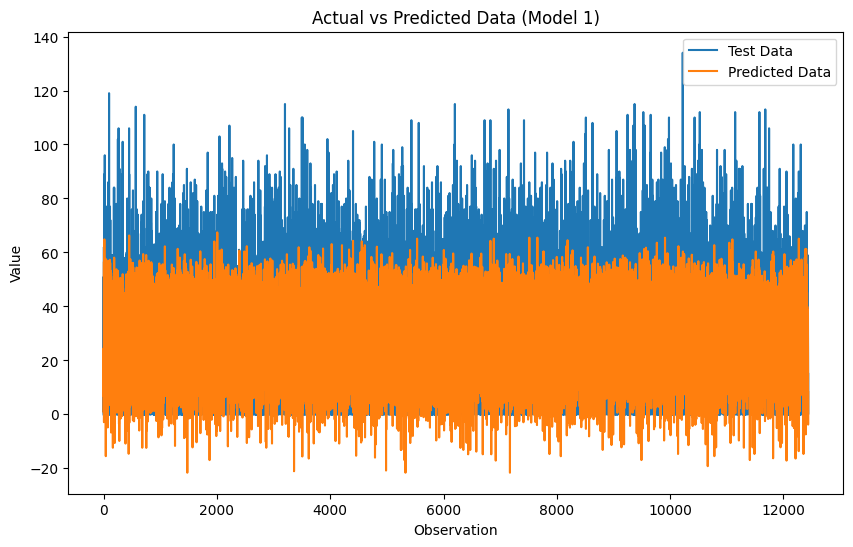

In [48]:
# Create line plot for Model v1
plt.figure(figsize=(10, 6))

plt.plot(y_test, label='Test Data')
plt.plot(y_pred_v1, label='Predicted Data')
plt.legend()
plt.title('Actual vs Predicted Data (Model 1)')
plt.xlabel('Observation')
plt.ylabel('Value')

plt.show()

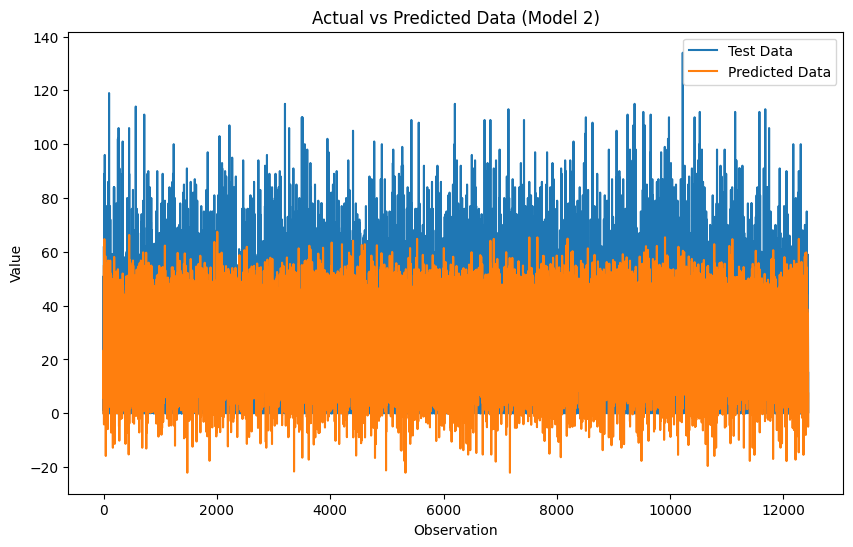

In [49]:
# Create line plot for Model v2
plt.figure(figsize=(10, 6))

plt.plot(y_test, label='Test Data')
plt.plot(y_pred_v2, label='Predicted Data')
plt.legend()
plt.title('Actual vs Predicted Data (Model 2)')
plt.xlabel('Observation')
plt.ylabel('Value')

plt.show()

#Step 7 · Summarize Your Results

Conclusion

Based on our findings, the developed model using stochastic gradient descent regression provides a decent prediction for the number of people visiting the gym based on the given features. However, it is worth noting that the model's accuracy is limited, and there is room for improvement. The model's performance can be improved by including additional features that can better capture the patterns and relationships within the dataset. Also, the model can be improved by experimenting with different hyperparameters to achieve better performance.

According to our analysis, the hour, temperature, and is_during_semester variables were the most significant predictors of the number of people visiting the gym. The best times for going to the gym would be during off-peak hours, preferably on weekdays, and when the temperature is mild or cool. Also, it appears that the gym is less busy during the semester, which may be due to the students having more classes and other academic activities.

In conclusion, based on the current model's findings, the number of people visiting the gym is mainly affected by the hour, temperature, and is_during_semester. However, the developed model's accuracy is limited and can be improved by incorporating additional features and experimenting with different hyperparameters. Therefore, we recommend collecting more data and optimizing the model further to provide better predictions